# Youtube Trending Videos US - Kaggle Dataset 1

We downloaded the data from https://www.kaggle.com/datasnaek/youtube-new on 01/12/2020.  

In [1]:
#import pandas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

## Load CSV data

In [2]:
#load data from the Kaggle dataset ' '
filename = '.ipynb_checkpoints/USvideos.csv'
df = pd.read_csv(filename)

In [3]:
#We take a look at our first dataset
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


This dataset contains 40949 videos. 
Now that we have our data, we start an exploratory data analysis for YouTube trending videos in the US. We will try to understand our dataset by exploring its features, summary values, missing values and doing some basic manipulations. 
This data analysis has been done after taking the LinkedIn course: 

# Exploratory data analysis 

In [4]:
# We are looking for some statistics to better understand the features of our dataset.
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


Observations: By looking at the max and min of different features, some trending videos have as little as 549 views, 
and others have over 225 million views. Some trending videos have 0 likes or comments (it is likely the ratings and comments are disabled), and others have over 5 million likes and 1 million comments.

### Viewing the first and last 5 rows 

In [5]:
#to see the 5 first rows...
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [6]:
# and 5 last rows
df.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...
40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...


### Checking the column data types

In [7]:
#This is to know which columns are ints, floats or objects(strings)
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [8]:
#Find the number of rows and columns in dataset 
df.shape

(40949, 16)

This dataset has 40949 rows and 16 columns

# Non null values

In [9]:
#Use df.info to see how many non-nul values we have (to find out if we do have nul values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

We notice all the entries are complete (all rows have 40 949 non nul values) except the 'description' column (index 15). The 'description' column has 570 nul-values. It is unlikely we will need this column so we will delete it later on.

# We're interested in looking more specifically at certain columns 

In [10]:
# We want to look at the first 5 rows for views, likes, dislikes. To do that, we select these three columns using double brackets.
#The double brackets allow us to keep a pandas dataframe.
df[['title','views','likes','dislikes']].head()

,title,views,likes,dislikes
0,WE WANT TO TALK ABOUT OUR MARRIAGE,748374,57527,2966
1,The Trump Presidency: Last Week Tonight with J...,2418783,97185,6146
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",3191434,146033,5339
3,Nickelback Lyrics: Real or Fake?,343168,10172,666
4,I Dare You: GOING BALD!?,2095731,132235,1989


### Selecting columns using .loc

In [11]:
df.loc[0:20, ['title', 'views', 'likes']]

,title,views,likes
0,WE WANT TO TALK ABOUT OUR MARRIAGE,748374,57527
1,The Trump Presidency: Last Week Tonight with J...,2418783,97185
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",3191434,146033
3,Nickelback Lyrics: Real or Fake?,343168,10172
4,I Dare You: GOING BALD!?,2095731,132235
5,2 Weeks with iPhone X,119180,9763
6,Roy Moore & Jeff Sessions Cold Open - SNL,2103417,15993
7,5 Ice Cream Gadgets put to the Test,817732,23663
8,The Greatest Showman | Official Trailer 2 [HD]...,826059,3543
9,Why the rise of the robots won’t mean the end ...,256426,12654


## Number of videos per category 

In [12]:
# We want to know how many videos there are per category.  
df['category_id'].value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64

The category that has the most number of videos is 24 which corresponds to 'Entertainment' (for equivalencies see the json file 'US_category_id', joined with the dataset when downloaded).

In [13]:
#is a filter function that can be used to select only columns or rows with certain values.
music_filter = df['category_id']==24

In [14]:
df.loc[music_filter, :]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
11,VifQlJit6A0,17.14.11,(SPOILERS) 'Shiva Saves the Day' Talked About ...,amc,24,2017-11-13T03:00:00.000Z,"The Walking Dead|""shiva""|""tiger""|""king ezekiel...",104578,1576,303,1279,https://i.ytimg.com/vi/VifQlJit6A0/default.jpg,False,False,False,Shiva arrives just in time as King Ezekiel att...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40930,wI89nVn6LHk,18.14.06,Maddie Poppe Wins American Idol 2018 - Finale ...,American Idol,24,2018-05-22T04:08:24.000Z,"ABC|""americanidol""|""idol""|""american idol""|""rya...",2003345,19895,2831,3481,https://i.ytimg.com/vi/wI89nVn6LHk/default.jpg,False,False,False,Maddie Poppe the crowd the American Idol 2018 ...
40932,tiF9SzzzX_o,18.14.06,The Voice 2018 Brynn Cartelli - Finale: Skyfall,The Voice,24,2018-05-22T02:34:39.000Z,"the voice season 14|""the voice finale performa...",1437051,19930,1794,1671,https://i.ytimg.com/vi/tiF9SzzzX_o/default.jpg,False,False,False,Brynn Cartelli sings Adele's Skyfall during th...
40934,Qcj15vHJTtk,18.14.06,Royal Wedding - SNL,Saturday Night Live,24,2018-05-20T04:58:51.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""SNL...",8607264,66559,14179,8382,https://i.ytimg.com/vi/Qcj15vHJTtk/default.jpg,False,False,False,Footage from Prince Harry's (Mikey Day) weddin...
40940,_QWZvU7VCn8,18.14.06,Brad Pitt Bid $120k For A Night With Emilia Cl...,The Graham Norton Show,24,2018-05-18T17:13:08.000Z,"Graham Norton|""Graham Norton Show Official""|""E...",5564576,46351,2295,2861,https://i.ytimg.com/vi/_QWZvU7VCn8/default.jpg,False,False,False,Check out all that Emilia Clarke merch... Subs...


In [15]:
#we want to look at videos with more than 100 million views only:
hundred_million_views_filter = df['views'] >= 100000000

In [16]:
df.loc[hundred_million_views_filter, :]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
2587,TyHvyGVs42U,17.26.11,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,10,2017-11-17T05:00:01.000Z,"Luis|""Fonsi""|""Demi""|""Lovato""|""Échame""|""La""|""Cu...",102012605,2376636,117196,134224,https://i.ytimg.com/vi/TyHvyGVs42U/default.jpg,False,False,False,“Échame La Culpa” disponible ya en todas las p...
5236,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656659,1353647,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5452,FlsCjmMhFmw,17.11.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113874632,2811215,1470383,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5699,FlsCjmMhFmw,17.12.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912702,1545015,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5935,FlsCjmMhFmw,17.13.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014471,1602383,817582,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
32924,ffxKSjUwKdU,18.05.05,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",101386547,2785262,110574,224694,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...
33132,ffxKSjUwKdU,18.06.05,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",107576105,2833950,113303,227754,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...
33339,ffxKSjUwKdU,18.07.05,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",112904452,2875001,115569,230421,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...
33546,ffxKSjUwKdU,18.08.05,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",117735467,2906264,117468,232015,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...


In [40]:
# we can combine the two previous filters to obtain music videos with more than 100 million views
df.loc[music_filter & hundred_million_views_filter, :]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
5236,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656659,1353647,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5452,FlsCjmMhFmw,17.11.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113874632,2811215,1470383,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5699,FlsCjmMhFmw,17.12.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912702,1545015,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5935,FlsCjmMhFmw,17.13.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014471,1602383,817582,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."


## Change the name of a column

In [20]:
# We want to change the name of the 'category_id'column to 'category'
df = df.rename(columns={'category_id': 'category'})

In [21]:
df.head()

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Deleting columns

In [22]:
# We might want to get rid of columns that we will not use, for example the description column since it is the only one with nul valus and we will not need it for our analyis.
df = df.drop(['description'], axis=1)

In [23]:
df.head()

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False


## Following the initial exploratory analysis of our dataset, we are interested in answering a series of question to understand the features of trending videos


## Investigating which video category has the largest number of trending videos

First of all, we need to replace the category number by the name of the category in our dataset (ie. entertainment, music...
This matches the category name to the category-id, to be found in the US_category_id.json file (downloaded from https://www.kaggle.com/datasnaek/youtube-new)
NOTE: The following lines of code have been adapted from code by 

In [9]:
# This creates a dictionary to hold a json file which has the info of categories
category_info={}
# by the help of this function we read the json file and then extract the data that we want to the dictionary
with open('.ipynb_checkpoints/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_info[category["id"]]=category["snippet"]["title"]

print(category_info)

# To map category_id and category infos I'm converting category_id to string type
df['category_id']=df['category_id'].astype(str)
# I'm creating Category columns thanks to map func.
df['Category']=df['category_id'].map(category_info)
df['Category'].head()

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '29': 'Nonprofits & Activism', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}


0    People & Blogs
1     Entertainment
2            Comedy
3     Entertainment
4     Entertainment
Name: Category, dtype: object

Text(0, 0.5, 'Number of videos')

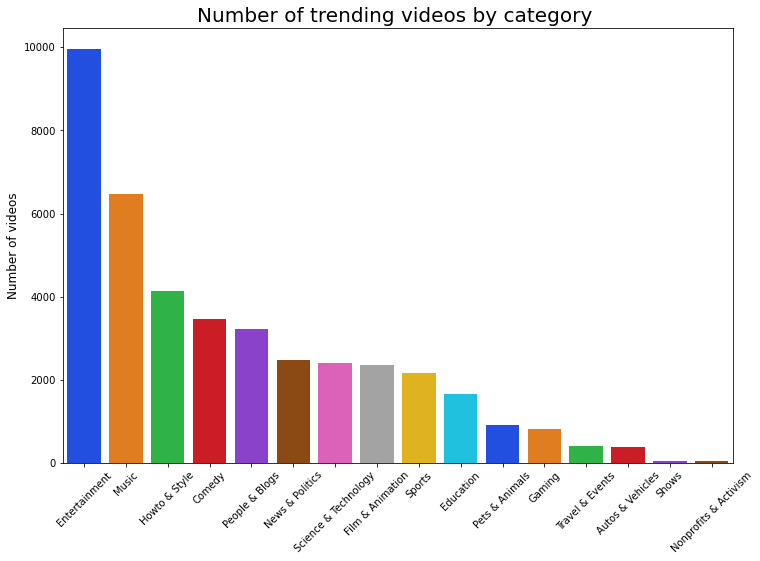

In [13]:
# Counting the video category names
plt.figure(figsize = (12,8))
gr = sns.countplot('Category', data=df, palette="bright", order = df['Category'].value_counts().index)
gr.set_xticklabels(gr.get_xticklabels(),rotation=45)
gr.set_title("Number of trending videos by category ", fontsize=20)
gr.set_xlabel("", fontsize=12)
gr.set_ylabel("Number of videos", fontsize=12)

# Viewers Engagement 
#### Users are more likely to engage(like, dislike, comment) in which category?

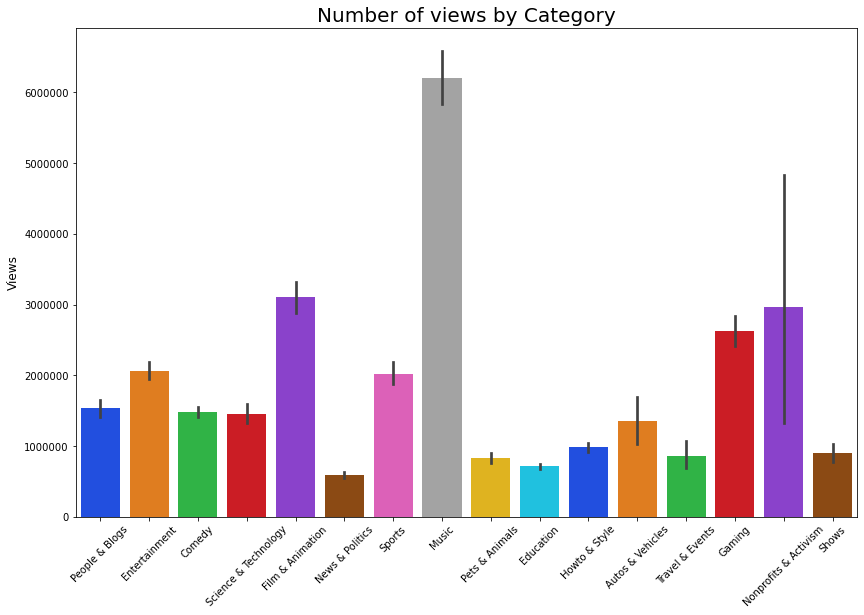

In [73]:
# Graphs to measure how many views, likes, dislikes and comments get by different categories
plt.figure(figsize = (14,9))

# Views distribution that shows watch rates of category names
g_v = sns.barplot(x="Category", y="views", data=df, palette="bright")
g_v.set_xticklabels(g_v.get_xticklabels(),rotation=45)
g_v.set_title("Number of views by Category", fontsize=20)
g_v.set_xlabel("", fontsize=12)
g_v.set_ylabel("Views", fontsize=12)

# This turns off the scientific notation for the y axis
plt.ticklabel_format(style='plain', axis ='y')


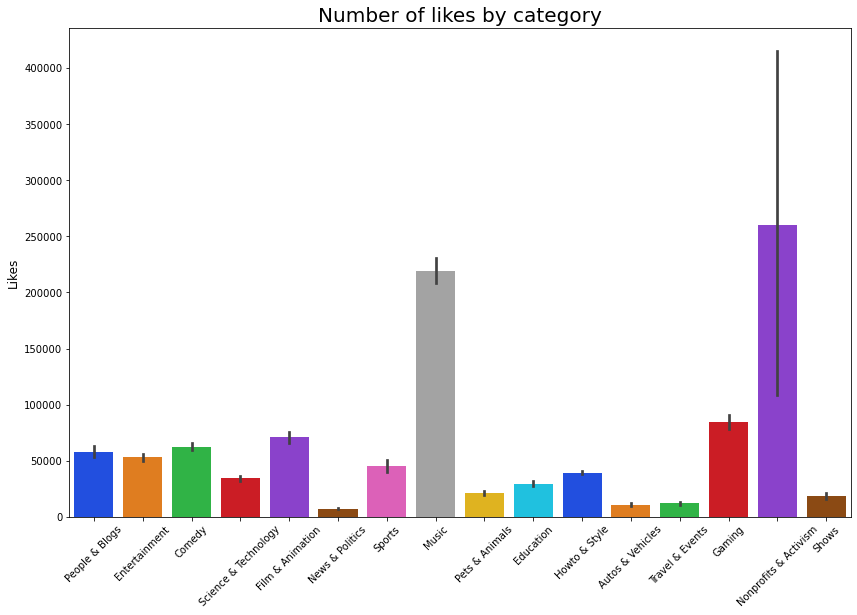

In [74]:
# Graphs to measure how many views, likes, dislikes and comments get by different categories
plt.figure(figsize = (14,9))

# Views distribution that shows watch rates of category names
g_v = sns.barplot(x="Category", y="likes", data=df, palette="bright")
g_v.set_xticklabels(g_v.get_xticklabels(),rotation=45)
g_v.set_title("Number of likes by category", fontsize=20)
g_v.set_xlabel("", fontsize=12)
g_v.set_ylabel("Likes", fontsize=12)

# This turns off the scientific notation for the y axis
plt.ticklabel_format(style='plain', axis ='y')


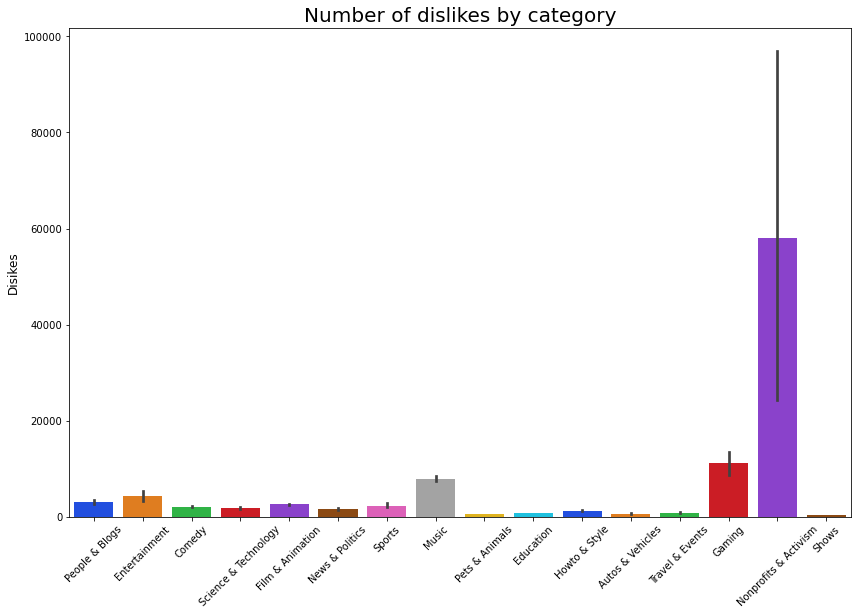

In [75]:
# Graphs to measure how many views, likes, dislikes and comments get by different categories
plt.figure(figsize = (14,9))

# Views distribution that shows watch rates of category names
g_v = sns.barplot(x="Category", y="dislikes", data=df, palette="bright")
g_v.set_xticklabels(g_v.get_xticklabels(),rotation=45)
g_v.set_title("Number of dislikes by category", fontsize=20)
g_v.set_xlabel("", fontsize=12)
g_v.set_ylabel("Disikes", fontsize=12)

# This turns off the scientific notation for the y axis
plt.ticklabel_format(style='plain', axis ='y')

## How are views, likes, dislikes, comment count, and other attributes correlated with each other? 

Correlation Heatmap (version 2) 
Coded following the steps from https://towardsdatascience.com/annotated-heatmaps-in-5-simple-steps-cc2a0660a27d

In [81]:
# We create the correlation matrix with .corr
corr_matrix = df.corr()

MemoryError: Unable to allocate 993. MiB for an array with shape (6358, 40949) and data type object

In [82]:
df_dummy = pd.get_dummies(df.video_id)
df = pd.concat([df, df_dummy], axis = 1)

In [83]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
mask[np.triu_indices_from(mask)]= True

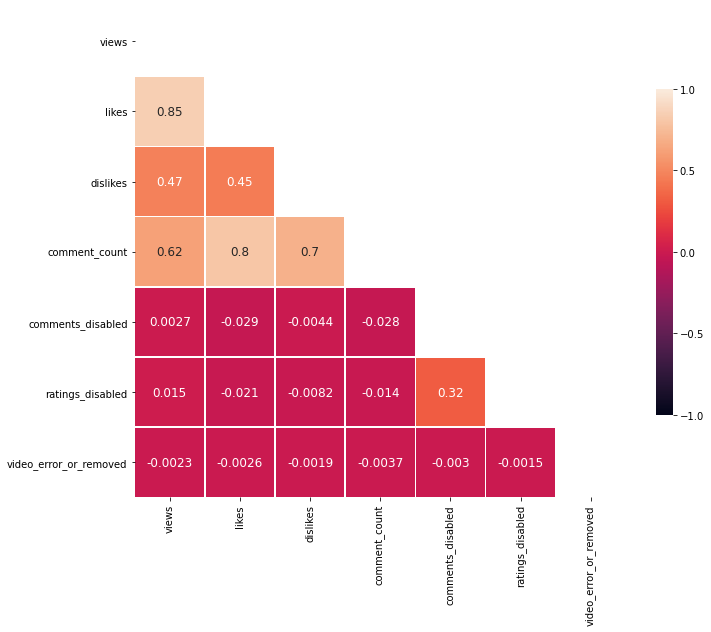

In [84]:
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})